C:\Users\ikhsa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


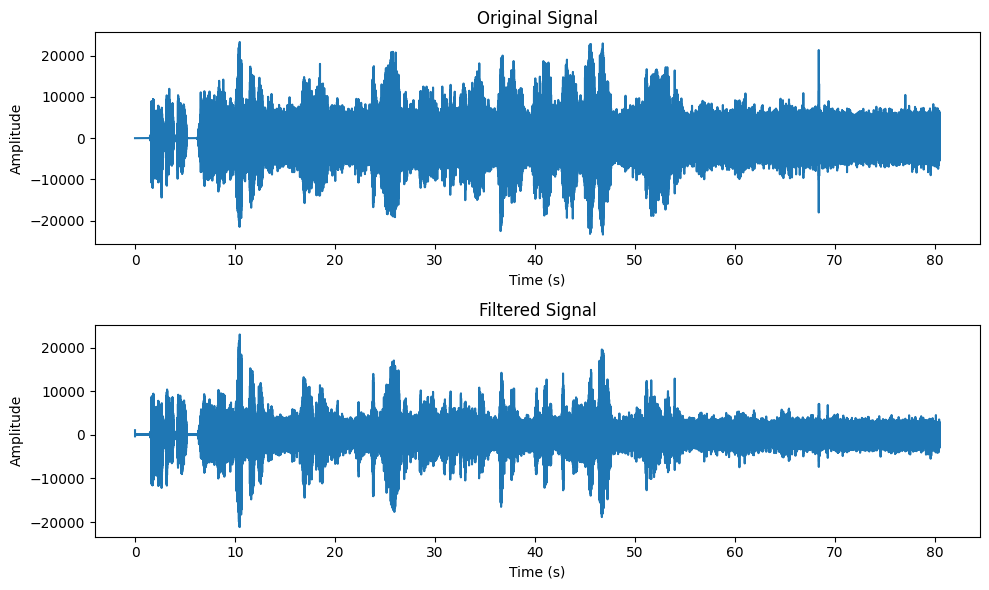

In [1]:
import numpy as np
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt

# Load the WAV file
sampling_rate, data = wav.read('datasetfile.wav')

# Extract mono audio channel if stereo
if len(data.shape) > 1:
    data = data[:, 0]

# Perform FFT on the audio data
fft_data = np.fft.fft(data)

# Calculate the frequency bins
freq_bins = np.fft.fftfreq(len(data), 1.0 / sampling_rate)

# Define the frequency range to remove noise (e.g., 500Hz - 2000Hz)
#noise_start_freq = 200
#noise_end_freq = -1000

# Find the indices corresponding to the noise frequency range
#start_idx = int(noise_start_freq * len(data) / sampling_rate)
#end_idx = int(noise_end_freq * len(data) / sampling_rate)

# Set the FFT data within the noise frequency range to zero
# Filter out frequencies associated with whale sounds (e.g., below 20Hz)
filtered_data = fft_data.copy()
#filtered_data[start_idx:end_idx] = 0
filtered_data[np.abs(freq_bins) > 1000] = 0
filtered_data[np.abs(freq_bins) < 20] = 0


# Perform inverse FFT to get filtered audio data
filtered_signal = np.fft.ifft(filtered_data)


# Plot the original and filtered signals
time = np.arange(0, len(data)) / sampling_rate
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(time, data)
plt.title('Original Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(time, filtered_signal)
plt.title('Filtered Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

# Save the filtered audio to a WAV file
filtered_audio_file = 'filtered_audio.wav'
wav.write(filtered_audio_file, sampling_rate, np.int16(filtered_signal.real))

# Play the original audio
import simpleaudio as sa
#wave_obj = sa.WaveObject.from_wave_file('datasetfile.wav')
#play_obj = wave_obj.play()
#play_obj.wait_done()

# Play the filtered audio
filtered_wave_obj = sa.WaveObject.from_wave_file(filtered_audio_file)
filtered_play_obj = filtered_wave_obj.play()
filtered_play_obj.wait_done()